In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

## Lectura de Datos

In [3]:
df = pd.read_csv("dia_2/sales_data.csv", sep=",", encoding="latin")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
## convertimos ORDERDATE de string a datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])
df["ORDERDATE"].dtype

dtype('<M8[ns]')

### Ejercicio 1: Existen columnas con valores a null. ¿cuántas son?

In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### Ejercicio 2: Calcula la media y la suma de las ventas (SALES) de la compañía

In [7]:
df["SALES"].sum()

10032628.85

In [11]:
df["SALES"].mean()

3553.889071909316

### Ejercicio 3: ¿Cuál es el valor de SALES de la última fila del dataset?

In [13]:
df["SALES"].tail(1)

2822    3079.44
Name: SALES, dtype: float64

### Ejercicio 4: ¿Cuántas filas contienen el valor Planes en PRODUCTLINE?

In [18]:
(df["PRODUCTLINE"] == "Planes").sum()

306

In [19]:
df["PRODUCTLINE"].value_counts()

Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

### Ejercicio 5: Crea un gráfico de barras con las frecuencias de PRODUCTLINE, de 5x3.

<Axes: >

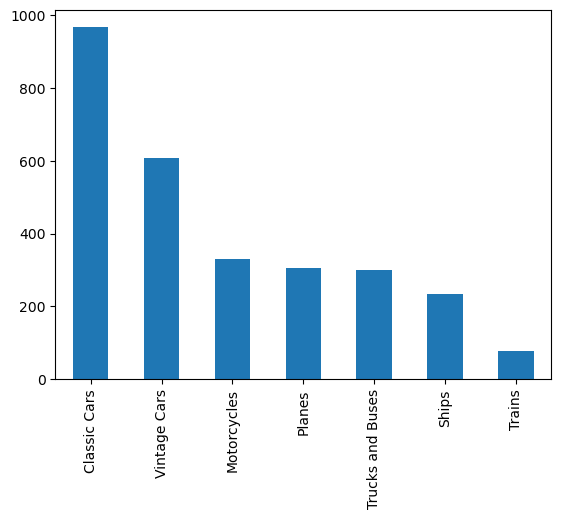

In [23]:
df["PRODUCTLINE"].value_counts().plot.bar(5,3)

### Ejercicio 6: ¿A cuántos países vende?, ¿Qué país aparece en más ocasiones?

In [28]:
df["COUNTRY"].nunique()

19

In [27]:
df["COUNTRY"].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

### Ejercicio 7: ¿Cuánto ha vendido (SALES) a España?

In [33]:
df["COUNTRY"].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

### Ejercicio 8: ¿Cuántos ingresos (SALES) ha obtenido por la venta de trenes (PRODUCTLINE) a España?

In [46]:
df.query("PRODUCTLINE=='Trains' & COUNTRY=='Spain'")["SALES"].sum()

43370.17999999999

In [47]:
df.query("YEAR_ID==2003 & QTR_ID==2")["SALES"].sum()

562365.22

### Ejercicio 9: Crea un Pivot Table donde se vea la suma de ingresos (SALES) por cada país y cada línea de producto

In [59]:
df_pt = df.pivot_table("SALES", "COUNTRY", "PRODUCTLINE", aggfunc="sum")
df_pt.to_csv("Dia_2/sales_country_product.csv", sep=";")
df_pt

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,193085.54,89968.76,74853.87,4159.76,1681.35,77318.50,189555.32
Austria,101459.47,26047.66,17860.44,9024.73,NaN,20472.75,27197.48
Belgium,20136.96,NaN,5624.79,31708.01,9017.26,NaN,41925.60
Canada,61623.22,4177.49,25510.07,40309.01,NaN,51945.98,40512.79
Denmark,157182.48,NaN,7586.45,38697.26,11476.33,9588.82,21105.81
Finland,153552.24,47866.72,34375.13,29808.44,5117.05,40479.33,18383.00
France,388951.20,226390.31,108155.51,66486.67,27340.80,116982.22,176609.81
Germany,148315.00,7497.50,23001.26,5501.00,5043.42,10178.00,20935.91
Ireland,31688.82,4953.20,11784.36,NaN,3112.60,3983.05,2234.40


### Ejercicio 9.1: Crea un gráfico de gradiente (parecido a un heatmap) para el pivot table anterior

Añade: .style.background_gradient(cmap='viridis').format(precision=4)

Cambia Viridis por una paleta que vaya del amarillo al marrón, y deja los números en 2 decimales.

https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [62]:
df.pivot_table("SALES", "COUNTRY", "PRODUCTLINE", aggfunc="sum")\
    .style.background_gradient(cmap='YlOrBr').format(precision=2)

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
COUNTRY,,,,,,,
Australia,193085.54,89968.76,74853.87,4159.76,1681.35,77318.50,189555.32
Austria,101459.47,26047.66,17860.44,9024.73,nan,20472.75,27197.48
Belgium,20136.96,nan,5624.79,31708.01,9017.26,nan,41925.60
Canada,61623.22,4177.49,25510.07,40309.01,nan,51945.98,40512.79
Denmark,157182.48,nan,7586.45,38697.26,11476.33,9588.82,21105.81
Finland,153552.24,47866.72,34375.13,29808.44,5117.05,40479.33,18383.00
France,388951.20,226390.31,108155.51,66486.67,27340.80,116982.22,176609.81
Germany,148315.00,7497.50,23001.26,5501.00,5043.42,10178.00,20935.91
Ireland,31688.82,4953.20,11784.36,nan,3112.60,3983.05,2234.40


In [63]:
df.pivot_table("SALES", "PRODUCTLINE", "COUNTRY", aggfunc="sum")\
    .style.background_gradient(cmap='YlOrBr').format(precision=2)

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
PRODUCTLINE,,,,,,,,,,,,,,,,,,,
Classic Cars,193085.54,101459.47,20136.96,61623.22,157182.48,153552.24,388951.20,148315.00,31688.82,128576.65,47271.49,134787.37,53112.09,132890.44,476165.15,69088.06,117713.56,159377.70,1344638.22
Motorcycles,89968.76,26047.66,nan,4177.49,nan,47866.72,226390.31,7497.50,4953.20,7567.80,26536.41,51768.63,18061.68,4175.60,74634.82,15567.25,nan,40802.81,520371.70
Planes,74853.87,17860.44,5624.79,25510.07,7586.45,34375.13,108155.51,23001.26,11784.36,98185.65,49176.96,29500.70,20906.87,nan,89985.51,8899.60,nan,41163.51,328432.89
Ships,4159.76,9024.73,31708.01,40309.01,38697.26,29808.44,66486.67,5501.00,nan,17703.54,18860.02,nan,nan,14155.52,124459.97,30915.89,nan,72959.17,209688.14
Trains,1681.35,nan,9017.26,nan,11476.33,5117.05,27340.80,5043.42,3112.60,6274.96,3523.67,11310.36,nan,13278.71,43370.18,3807.68,nan,12635.54,69253.56
Trucks and Buses,77318.50,20472.75,nan,51945.98,9588.82,40479.33,116982.22,10178.00,3983.05,5914.97,13349.44,37075.64,nan,89027.68,177556.78,47931.27,nan,28142.99,397842.42
Vintage Cars,189555.32,27197.48,41925.60,40512.79,21105.81,18383.00,176609.81,20935.91,2234.40,110450.74,29449.82,43021.00,1935.09,34960.46,229514.51,33804.46,nan,123798.74,757755.90


### Ejercicio 10: Usando GroupBy crea una tabla con la suma de SALES en función de la línea de producto y del status

In [65]:
df.groupby(["STATUS", "PRODUCTLINE"])["SALES"].sum()

STATUS      PRODUCTLINE     
Cancelled   Classic Cars          59242.81
            Planes                35432.71
            Ships                 56665.65
            Trains                 5082.42
            Vintage Cars          38063.89
Disputed    Classic Cars          26012.87
            Motorcycles           31821.90
            Planes                 3843.84
            Ships                  3070.40
            Vintage Cars           7463.85
In Process  Classic Cars          57760.66
            Trucks and Buses      43026.41
            Vintage Cars          43942.89
On Hold     Classic Cars          49039.65
            Motorcycles            4992.61
            Planes                34727.53
            Ships                 23664.61
            Trains                 5808.48
            Trucks and Buses      20193.29
            Vintage Cars          40553.02
Resolved    Classic Cars          25799.34
            Planes                34532.92
            Ships        

### Ejercicio 11: Usando GroupBy calcula los precios mínimos de cada línea de producto

In [68]:
df.groupby(["PRODUCTLINE"])["PRICEEACH"].min()

PRODUCTLINE
Classic Cars        28.29
Motorcycles         32.59
Planes              40.22
Ships               43.68
Trains              36.07
Trucks and Buses    35.71
Vintage Cars        26.88
Name: PRICEEACH, dtype: float64

### Ejercicio 12: Usa un código como el siguiente para calcular el número medio y máximo de ingresos de cada país

df.groupby(["col1", "col2"...])["col"].aggregate("mean", "max")

In [71]:
df.groupby(["COUNTRY"])["SALES"].aggregate(["mean", "max"])

,mean,max
COUNTRY,,
Australia,3408.773514,9774.03
Austria,3673.864182,9240.00
Belgium,3285.230909,6804.63
Canada,3201.122286,9064.89
Denmark,3899.002381,10468.90
Finland,3582.412065,10606.20
France,3537.950701,11739.70
Germany,3556.001452,8940.96
Ireland,3609.776875,8258.00


### Ejercicio 13: Calcula el número de duplicados de la columna CUSTOMERNAME y después el número de clientes únicos que tiene la empresa

In [77]:
df["CUSTOMERNAME"].duplicated().sum()

2731

In [76]:
df["CUSTOMERNAME"].nunique()

92

In [85]:
df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False)

CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
                                  ...    
Royale Belge                     33440.10
Microscale Inc.                  33144.93
Auto-Moto Classics Inc.          26479.26
Atelier graphique                24179.96
Boards & Toys Co.                 9129.35
Name: SALES, Length: 92, dtype: float64

In [88]:
df.query("CUSTOMERNAME == 'Euro Shopping Channel'")["COUNTRY"].unique()

array(['Spain'], dtype=object)

In [91]:
df["YEAR_Q"] = df["YEAR_ID"].astype(str) + "-" + df["QTR_ID"].astype(str)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR_Q
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2003-1
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2003-2
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003-3
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,2003-3
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,2003-4


### Ejercicio 14: Usando el siguiente código:

df.pivot_table("SALES", index="YEAR_Q", columns="COUNTRY", aggfunc="sum")

añade lo necesario para seleccionar dos países y hacer: 
- un gráfico de barras (barplot)
- un gráfico de áreas

Mirar en el cheatsheet de "cheat_sheet_pandas_seaborn.pdf"

<Axes: xlabel='YEAR_Q'>

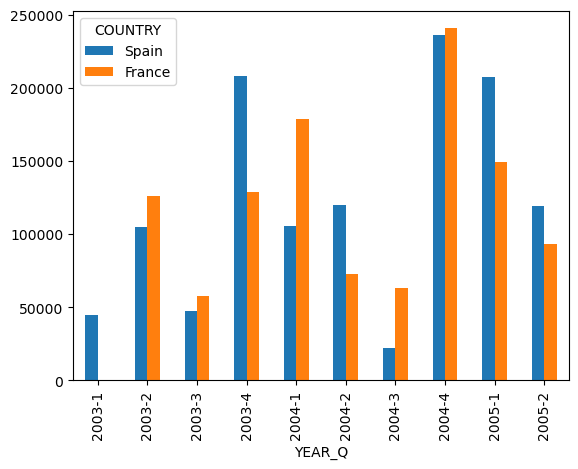

In [96]:
df.pivot_table("SALES", index="YEAR_Q", columns="COUNTRY", aggfunc="sum")[["Spain", "France"]].plot.bar()

<Axes: xlabel='YEAR_Q'>

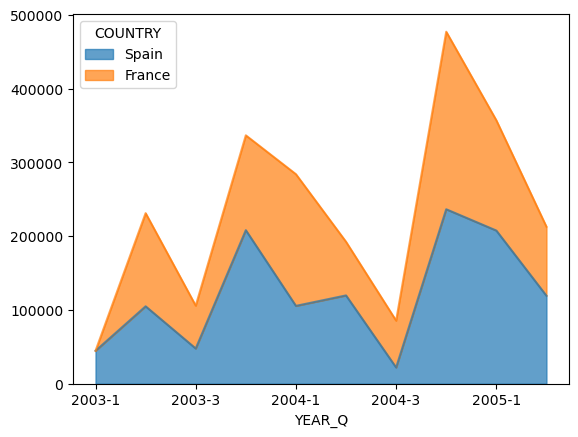

In [101]:
df.pivot_table("SALES", index="YEAR_Q", columns="COUNTRY", aggfunc="sum")[["Spain", "France"]].plot.area(alpha=0.7)

### Ejercicio 15: Mirando en el cheatsheet de "cheat_sheet_pandas_seaborn.pdf", dibuja un gráfico de tarta con SALES y COUNTRY

Utiliza el código del ejercicio 12, pero usando tan solo la función: sum()

<Axes: ylabel='SALES'>

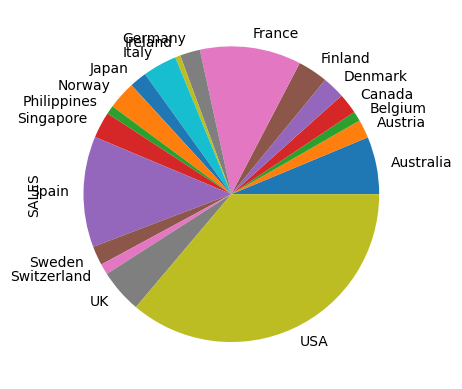

In [105]:
df.groupby(["COUNTRY"])["SALES"].sum().plot.pie()

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ejercicio 16: Mirando en el cheatsheet de "cheat_sheet_pandas_seaborn.pdf", dibuja con seaborn (sns), un boxplot con los precios de los productos por cada línea de producto

<Axes: >

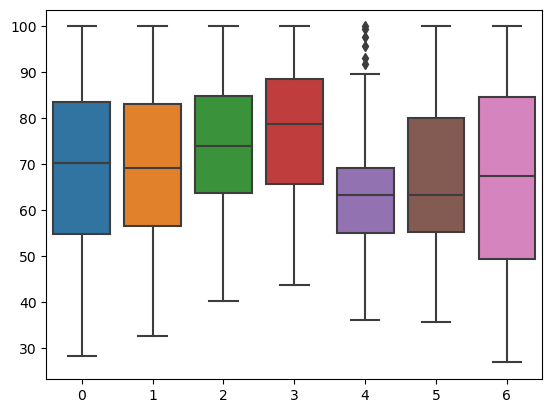

In [119]:
df_pp = df.groupby(["PRODUCTLINE"])["PRICEEACH"].unique()
sns.boxplot(df_pp)

<Axes: xlabel='PRODUCTLINE', ylabel='PRICEEACH'>

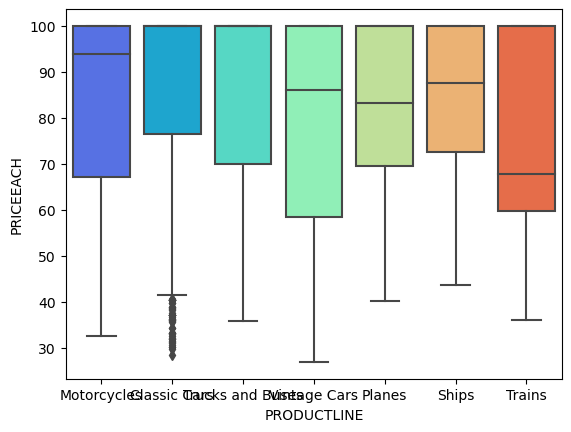

In [120]:
sns.boxplot(x="PRODUCTLINE", y="PRICEEACH", data=df, palette="rainbow")

<Axes: xlabel='PRODUCTLINE', ylabel='PRICEEACH'>

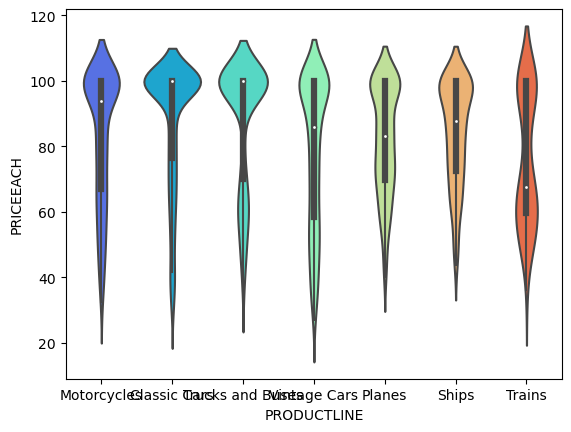

In [121]:
sns.violinplot(x="PRODUCTLINE", y="PRICEEACH", data=df, palette="rainbow")

<Axes: >

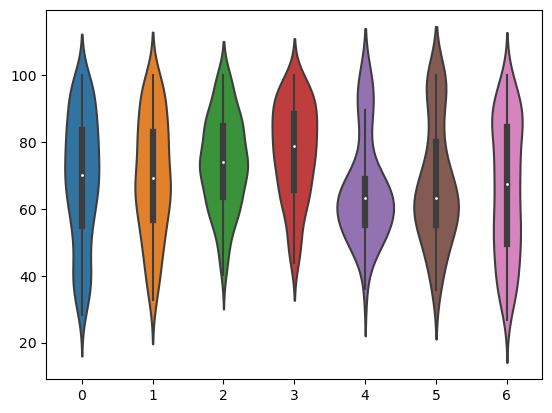

In [124]:
df_pp = df.groupby(["PRODUCTLINE"])["PRICEEACH"].unique()
sns.violinplot(df_pp)

### Ejercicio 17: Dibuja un gráfico de nube de puntos (scatterplot) con los precios en el eje x y las ventas en el y. 

- Añade el parámetro "alpha=0.3" para darles transparencia
- Aplica color en función de la cantidad pedida ("QUANTITYORDERED") y con el cmap que quieras


<Axes: xlabel='PRICEEACH', ylabel='SALES'>

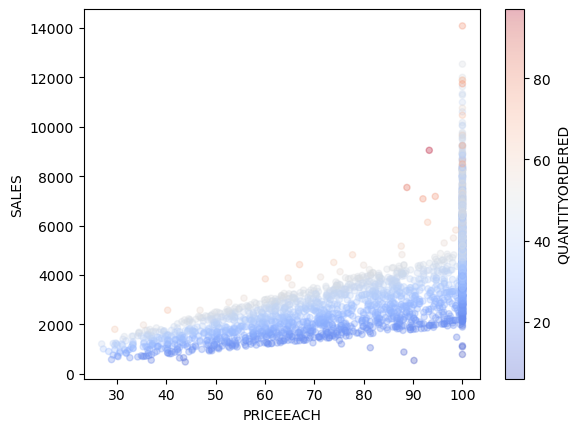

In [128]:
df.plot.scatter(x="PRICEEACH", y="SALES", c="QUANTITYORDERED", alpha=0.3,  cmap="coolwarm")